In [10]:
import numpy as np
# we use binomial (with p = 0.5) as a discrete approximation for normal distribution
from scipy.stats import binom
import matplotlib.pyplot as plt

In [28]:
# fake some data which centers around 0
dataset1 = np.random.normal(scale = 0.1, size = 1000)
dataset2 = np.random.uniform(low = -0.05, high = 0.05, size = 10000)
dataset = np.append(dataset1, dataset2)

(array([2.000e+00, 6.000e+00, 5.000e+00, 1.700e+01, 1.800e+01, 3.700e+01,
        6.500e+01, 6.200e+01, 5.550e+02, 3.131e+03, 3.136e+03, 3.007e+03,
        7.260e+02, 8.400e+01, 6.100e+01, 3.900e+01, 2.500e+01, 1.500e+01,
        5.000e+00, 4.000e+00]),
 array([-0.31085521, -0.28133732, -0.25181942, -0.22230152, -0.19278362,
        -0.16326573, -0.13374783, -0.10422993, -0.07471204, -0.04519414,
        -0.01567624,  0.01384166,  0.04335955,  0.07287745,  0.10239535,
         0.13191324,  0.16143114,  0.19094904,  0.22046694,  0.24998483,
         0.27950273]),
 <BarContainer object of 20 artists>)

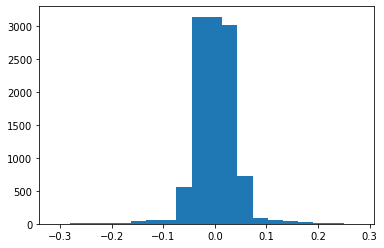

In [29]:
# a pretty centralized distribution, similar to our case
plt.hist(dataset, bins=20)

In [83]:
class FakeLoader(object):
    def calc_bin(self, rn):
        mult = round(1 / self.bin_sz)
        d = rn * mult // 1
        return d * self.bin_sz, (d + 1) * self.bin_sz
        
    def __init__(self, sigma = 0.1, thres_prob = 0.7, bin_sz = 0.05):
        self.sigma = sigma
        self.thres_prob = thres_prob
        self.bin_sz = bin_sz
    def get_item(self, index):
        a = np.random.rand()
        if a > self.thres_prob:
            return dataset[index]
        else:
            rn = np.random.normal(scale = self.sigma)
            low, high = self.calc_bin(rn)
            subset = dataset[(dataset >= low) & (dataset <= high)]
            # degenerate case :) ignore this
            if not len(subset):
                return dataset[index]
            else:
                return np.random.choice(subset)
            

In [84]:
loader = FakeLoader(thres_prob=1)

In [91]:
augmented_data = []

for i in range(len(dataset)):
    augmented_data.append(loader.get_item(i))

(array([  11.,   62.,   66.,  220.,  210.,  388.,  717.,  782., 1121.,
        1240., 1298., 1233., 1053.,  900.,  623.,  447.,  339.,  155.,
          60.,   75.]),
 array([-0.31085521, -0.28133732, -0.25181942, -0.22230152, -0.19278362,
        -0.16326573, -0.13374783, -0.10422993, -0.07471204, -0.04519414,
        -0.01567624,  0.01384166,  0.04335955,  0.07287745,  0.10239535,
         0.13191324,  0.16143114,  0.19094904,  0.22046694,  0.24998483,
         0.27950273]),
 <BarContainer object of 20 artists>)

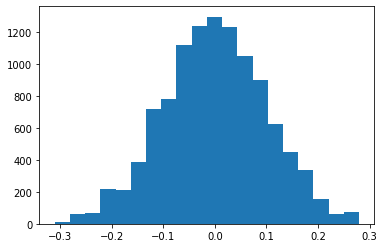

In [93]:
plt.hist(augmented_data, bins=20)